In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_flow(path, src_ip, dst_ip):
    data = pd.read_csv(path)
    raw_data = data.values

    clean_data = []
    flows = []

    # 패킷의 전송 간격을 구함
    interval = []
    last = 0
    for line in raw_data:
        if line[2] == src_ip and line[3] == dst_ip:
            interval.append(line[1]-last)
            last = line[1]
            clean_data.append(line)

    # 패킷 평균 전송 간격
    avg = sum(interval) / len(interval)

    diverge = []

    i = 0
    # 평균 전송간격보다 큰 경우 flow를 분리를 위한 인덱스 찾기
    for t in interval:
        if t >= avg:
            diverge.append(i)
        i = i + 1

    # 찾은 인덱스로 flow를 분리
    prefix = 0
    for idx in diverge:
        if idx >= len(clean_data):
            break
        flow = clean_data[prefix:idx]
        flows.append(flow)
        prefix = idx + 1

    if len(flows) < 100:
        return 0
    print("## 총 ", len(flows), "개의 flow 발견")

    # 평균 인터벌
    avg_ivl = []
    # 평균 페이로드 크기
    avg_pay = []
    # 평균 패킷 수
    avg_cnt = []
    # 프로토콜 넘뻐
    pcl = []

    for flow in flows:
        last = 0
        ivl = 0
        payload = 0
        if len(flow) <= 0:
            continue
        for line in flow:
            ivl = ivl + (line[1]-last)
            last = line[1]
            payload = payload + line[5]

        # 값 입력
        avg_ivl.append(ivl / len(flow))
        avg_pay.append(payload / len(flow))
        avg_cnt.append(len(flow))
        pcl.append(flow[0][4])

    return [avg_ivl, avg_cnt, avg_pay, pcl]


In [137]:
# for preprocessing only
def data_process(path):
    nm = path.split('/')[3]
    print(nm)
    data = pd.read_csv(path)
    src_set = set(data["ip.src"])
    
    rl = np.array([])
    
    for ips in src_set:
        if type(ips) == float:
            continue
        dst_set = set(data[data["ip.src"] == ips]["ip.dst"])
        for ipd in dst_set:
            tmp = get_flow(path, ips, ipd)
            if tmp != 0:
                tmp = np.array(tmp)
                if len(rl) == 0:
                    rl = tmp
                else:
                    rl = np.hstack((rl, tmp))
    rl = pd.DataFrame(rl.transpose(), columns=['ivl', 'cnt', 'pay', 'pcl'])
    print(rl)
    rl.to_csv("./processed/VPN/" + nm + "_processed.csv", index=False)

In [138]:
data_process("./Datasets/VPN/Chat/merge.csv")
data_process("./Datasets/VPN/Email/merge.csv")
data_process("./Datasets/VPN/FileTransfer/merge.csv")
data_process("./Datasets/VPN/P2P/merge.csv")
data_process("./Datasets/VPN/Streaming/merge.csv")
data_process("./Datasets/VPN/VoIP/merge.csv")

Chat
## 총  211 개의 flow 발견
## 총  127 개의 flow 발견
## 총  959 개의 flow 발견
## 총  101 개의 flow 발견
## 총  181 개의 flow 발견
## 총  259 개의 flow 발견
## 총  169 개의 flow 발견
## 총  105 개의 flow 발견
## 총  334 개의 flow 발견
## 총  1141 개의 flow 발견
## 총  169 개의 flow 발견
## 총  1508 개의 flow 발견
## 총  454 개의 flow 발견
## 총  172 개의 flow 발견
## 총  1214 개의 flow 발견
## 총  114 개의 flow 발견
## 총  160 개의 flow 발견
## 총  581 개의 flow 발견
## 총  162 개의 flow 발견
## 총  406 개의 flow 발견
## 총  212 개의 flow 발견
## 총  163 개의 flow 발견
## 총  1221 개의 flow 발견
## 총  136 개의 flow 발견
## 총  151 개의 flow 발견
## 총  153 개의 flow 발견
## 총  561 개의 flow 발견
## 총  205 개의 flow 발견
## 총  255 개의 flow 발견
## 총  959 개의 flow 발견
## 총  155 개의 flow 발견
## 총  1274 개의 flow 발견
## 총  208 개의 flow 발견
## 총  414 개의 flow 발견
## 총  145 개의 flow 발견
## 총  124 개의 flow 발견
## 총  253 개의 flow 발견
## 총  241 개의 flow 발견
## 총  172 개의 flow 발견
## 총  120 개의 flow 발견
## 총  162 개의 flow 발견
## 총  554 개의 flow 발견
              ivl   cnt         pay   pcl
0        0.059253   2.0  166.000000  17.0
1        0.324848  12.0 

P2P
## 총  915 개의 flow 발견
## 총  516 개의 flow 발견
## 총  832 개의 flow 발견
## 총  518 개의 flow 발견
## 총  461 개의 flow 발견
## 총  529 개의 flow 발견
             ivl    cnt          pay  pcl
0      12.696829    8.0  1404.000000  6.0
1     101.663823    1.0    66.000000  6.0
2       5.351317   19.0  1404.000000  6.0
3       2.609643   39.0  1404.000000  6.0
4     101.851266    1.0   424.000000  6.0
5      12.732845    8.0  1404.000000  6.0
6       2.167587   47.0  1404.000000  6.0
7       5.366486   19.0  1404.000000  6.0
8       2.169717   47.0  1404.000000  6.0
9       2.617024   39.0  1404.000000  6.0
10      1.437707   71.0  1404.000000  6.0
11      2.173725   47.0  1404.000000  6.0
12      0.888503  115.0  1404.000000  6.0
13      2.175877   47.0  1404.000000  6.0
14      0.577870  177.0  1404.000000  6.0
15      1.483566   69.0  1404.000000  6.0
16      0.530499  193.0  1404.000000  6.0
17      0.305934  335.0  1404.000000  6.0
18      1.314979   78.0  1404.000000  6.0
19      1.015669  101.0  1404.

## 총  205 개의 flow 발견
## 총  330 개의 flow 발견
## 총  207 개의 flow 발견
## 총  136 개의 flow 발견
## 총  243 개의 flow 발견
## 총  361 개의 flow 발견
## 총  398 개의 flow 발견
## 총  309 개의 flow 발견
## 총  202 개의 flow 발견
               ivl   cnt         pay  pcl
0         0.209967  53.0  125.358491  6.0
1         2.955032  13.0  127.153846  6.0
2         0.609416  68.0  135.882353  6.0
3         1.102713  65.0  135.323077  6.0
4        16.401867   6.0  130.000000  6.0
5         1.725039  59.0  129.050847  6.0
6         2.236308  59.0  135.135593  6.0
7        19.801763   8.0  138.375000  6.0
8         2.945935  55.0  131.145455  6.0
9         3.559280  54.0  130.500000  6.0
10       36.401465   6.0  118.166667  6.0
11        4.536866  49.0  141.387755  6.0
12        4.674398  54.0  136.648148  6.0
13       45.568126   6.0  107.666667  6.0
14       39.774038   7.0  133.857143  6.0
15        4.631935  61.0  129.377049  6.0
16        5.298867  59.0  132.593220  6.0
17       48.344957   7.0  109.000000  6.0
18        5.8

In [2]:
"""
# for origin data only
low_flow = get_flow("./30sec_server.csv", '10.0.0.1', '10.0.0.2')
high_flow = get_flow("./Datasets/nonVPN/Chat/merge.csv", '131.202.240.87', '10.0.0.2')
chat_flow = get_flow("./chat_server.csv", '10.0.0.1', '10.0.0.2')
"""
target_nm = 2
class_nm = ['Chat', 'Email', 'FileTransfer', 'P2P', 'Streaming', 'VoIP']
oposit_data = []
for i in range(len(class_nm)):
    if i == target_nm:
        target_data = pd.read_csv("./processed/" + class_nm[i] + "_processed.csv").values
        print(target_data)
    else:
        oposit_data.extend(pd.read_csv("./processed/" + class_nm[i] + "_processed.csv").values)
        
print(len(target_data))
#oposit_data = oposit_data[150000:300000]
print(len(oposit_data))

[[1.18934500e-01 2.00000000e+00 5.18500000e+02 6.00000000e+00]
 [3.23526600e+00 1.00000000e+00 5.20000000e+01 6.00000000e+00]
 [6.22584100e+00 1.00000000e+00 5.20000000e+01 6.00000000e+00]
 ...
 [2.31508845e+02 1.00000000e+00 1.36000000e+03 6.00000000e+00]
 [2.31739388e+02 1.00000000e+00 1.36000000e+03 6.00000000e+00]
 [2.32393300e+02 1.00000000e+00 1.36000000e+02 6.00000000e+00]]
26017
526988


In [7]:
print(target_data[:10000])
print(oposit_data[:10000])

[[1.18934500e-01 2.00000000e+00 5.18500000e+02 6.00000000e+00]
 [3.23526600e+00 1.00000000e+00 5.20000000e+01 6.00000000e+00]
 [6.22584100e+00 1.00000000e+00 5.20000000e+01 6.00000000e+00]
 ...
 [6.11773982e+00 3.90000000e+01 1.33200000e+03 6.00000000e+00]
 [4.87006778e+00 4.90000000e+01 1.36000000e+03 6.00000000e+00]
 [5.68649157e+00 4.20000000e+01 1.31714286e+03 6.00000000e+00]]
[array([197.2892975,   2.       , 125.       ,  17.       ]), array([394.621092,   1.      , 125.      ,  17.      ]), array([197.3402105,   2.       , 125.       ,  17.       ]), array([394.724321,   1.      , 125.      ,  17.      ]), array([197.3912895,   2.       , 125.       ,  17.       ]), array([197.421829,   2.      , 125.      ,  17.      ]), array([394.884279,   1.      , 125.      ,  17.      ]), array([197.4735465,   2.       , 125.       ,  17.       ]), array([394.974415,   1.      , 125.      ,  17.      ]), array([395.017149,   1.      , 125.      ,  17.      ]), array([197.538245,   2.      

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler = MinMaxScaler()
scaler.fit(target_data)
target_data = scaler.transform(target_data)

In [5]:
scaler.fit(oposit_data)
oposit_data = scaler.transform(oposit_data)

In [6]:
target_data = pd.DataFrame({'interval': target_data[:, 0], 'count': target_data[:, 1], 'size': target_data[:, 2], 'proto': target_data[:, 3], 'label': 0})
oposit_data = pd.DataFrame({'interval': oposit_data[:, 0], 'count': oposit_data[:, 1], 'size': oposit_data[:, 2], 'proto': oposit_data[:, 3], 'label': 1})

In [7]:
full_data = pd.concat([target_data, oposit_data])

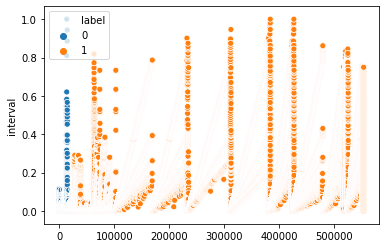

In [8]:
sns.scatterplot(x=range(len(full_data['interval'])), y=full_data['interval'], hue=full_data['label'])

In [9]:
from sklearn.cluster import KMeans, DBSCAN

In [10]:
X = full_data.drop(['label'], axis=1)
Y = full_data['label']

In [11]:
kmeans = KMeans(n_clusters=2).fit(X.values)
X['cid'] = kmeans.labels_

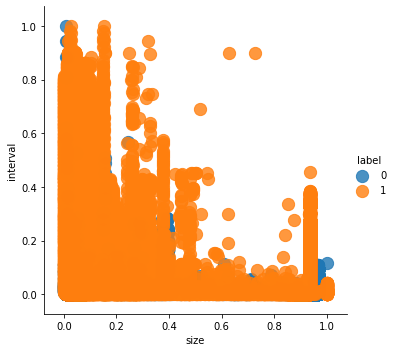

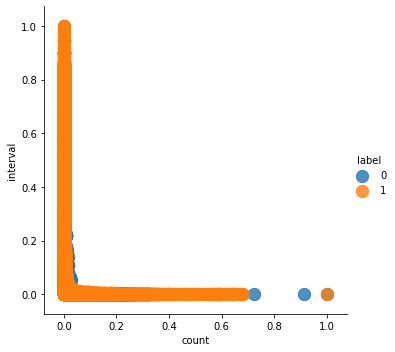

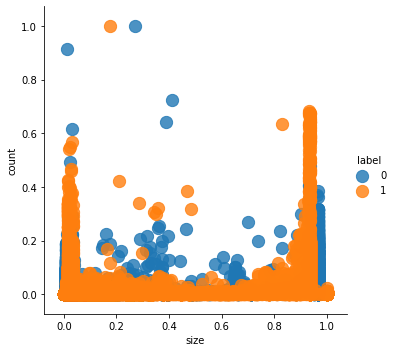

In [12]:
sns.lmplot('size', 'interval', data=full_data, fit_reg=False, scatter_kws={'s':150}, hue='label')
sns.lmplot('count', 'interval', data=full_data, fit_reg=False, scatter_kws={'s':150}, hue='label')
sns.lmplot('size', 'count', data=full_data, fit_reg=False, scatter_kws={'s':150}, hue='label')

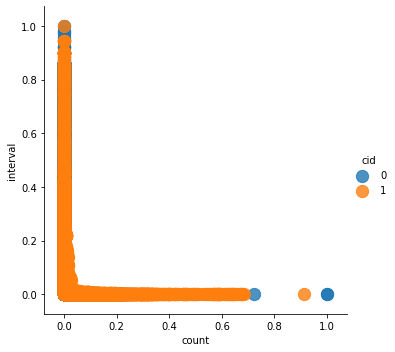

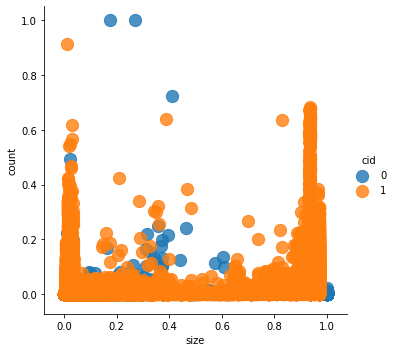

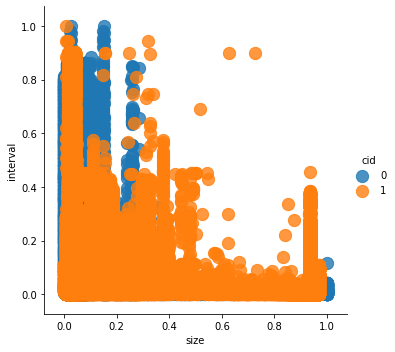

In [13]:
sns.lmplot('count', 'interval', data=X, fit_reg=False, scatter_kws={'s':150}, hue='cid')
sns.lmplot('size', 'count', data=X, fit_reg=False, scatter_kws={'s':150}, hue='cid')
sns.lmplot('size', 'interval', data=X, fit_reg=False, scatter_kws={'s':150}, hue='cid')

In [14]:
y_pred = list(kmeans.labels_)
scoreY = list(Y)
hit = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == scoreY[i]:
        hit = hit + 1
print(hit/len(scoreY))

0.14915055017585735


In [15]:
X = X.drop(['cid'], axis=1)

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=3000).fit(X)

In [ ]:
y_pred = dbscan.fit_predict(X)
X['cid'] = y_pred

In [ ]:
sns.lmplot('size', 'interval', data=full_data, fit_reg=False, scatter_kws={'s':150}, hue='label')
sns.lmplot('count', 'interval', data=full_data, fit_reg=False, scatter_kws={'s':150}, hue='label')
sns.lmplot('size', 'count', data=full_data, fit_reg=False, scatter_kws={'s':150}, hue='label')

In [ ]:
sns.lmplot('count', 'interval', data=X, fit_reg=False, scatter_kws={'s':50}, hue='cid')
sns.lmplot('size', 'count', data=X, fit_reg=False, scatter_kws={'s':50}, hue='cid')
sns.lmplot('size', 'interval', data=X, fit_reg=False, scatter_kws={'s':50}, hue='cid')

In [ ]:
hit = 0
for i in range(0, len(y_pred)):
    if (y_pred[i] + scoreY[i]) == 0:
        hit = hit + 1
print(hit/len(scoreY))

In [12]:
import tensorflow as tf
import time
from dagmm import DAGMM

In [13]:
full_data = pd.concat([target_data, oposit_data])
X = full_data.drop(['label'], axis=1)

In [14]:
tf.reset_default_graph()

In [15]:
model_dagmm = DAGMM(
    comp_hiddens=[16,8,1], comp_activation=tf.nn.tanh,
    est_hiddens=[8,4], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=200, minibatch_size=150
)

In [16]:
start = time.time()
model_dagmm.fit(X)
end = time.time()
print("Learning time = ", end-start)

InternalError: tensorflow/core/kernels/cuda_solvers.cc:375: cuSolverDN call failed with status =7
	 [[Node: GMM/Cholesky = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add)]]

Caused by op 'GMM/Cholesky', defined at:
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/asyncio/base_events.py", line 1425, in _run_once
    handle._run()
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2714, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2818, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-a752b3805b85>", line 2, in <module>
    model_dagmm.fit(X)
  File "/home/inns-mainframe-1/Documents/GitHub/IMCOM2020/dagmm/dagmm.py", line 119, in fit
    self.gmm.fit(z, gamma)
  File "/home/inns-mainframe-1/Documents/GitHub/IMCOM2020/dagmm/gmm.py", line 53, in fit
    self.L = tf.cholesky(sigma + min_vals[None,:,:])
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 707, in cholesky
    "Cholesky", input=input, name=name)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/home/inns-mainframe-1/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InternalError (see above for traceback): tensorflow/core/kernels/cuda_solvers.cc:375: cuSolverDN call failed with status =7
	 [[Node: GMM/Cholesky = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](GMM/add)]]


In [22]:
full_data = pd.concat([target_data, oposit_data])
X = full_data.drop(['label'], axis=1)
Y = full_data['label']

In [30]:
energy = model_dagmm.predict(X)

/home/inns-mainframe-1/Documents/GitHub/IMCOM2020/dagmm/dagmm.py:186: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  x = self.scaler.transform(x)


ValueError: operands could not be broadcast together with shapes (407531,7) (4,) (407531,7) 

Text(0, 0.5, 'Number of Sample(s)')

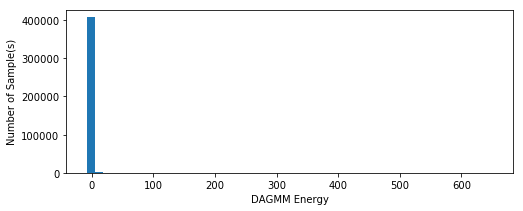

In [24]:
plt.figure(figsize=[8,3])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")

In [36]:
energy.sort()
threshold = len(energy)*0.9
print(threshold)
threshold = energy[-int(threshold)]
print(threshold)
cid = []
for node in energy:
    if node > threshold:
        cid.append(1)
    else:
        cid.append(0)

366777.9
-8.014204


In [37]:
X['cid'] = cid
X['energy'] = energy
X['label'] = Y

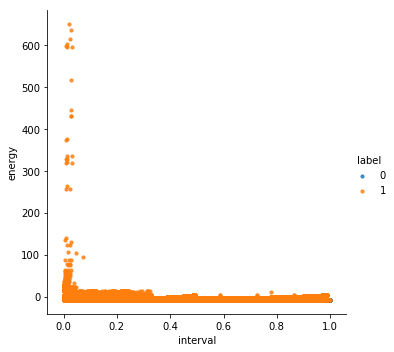

In [38]:
sns.lmplot('interval', 'energy', data=X, fit_reg=False, scatter_kws={'s':10}, hue='label')

In [43]:
y_pred = list(X['cid'])
scoreY = list(X['label'])
hit = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == scoreY[i] and scoreY[i] == 1:
        hit = hit + 1
print("PP", hit/len([x for x in scoreY if x == 1]))

hit = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == scoreY[i] and scoreY[i] == 0:
        hit = hit + 1
print("FF", hit/len([x for x in scoreY if x == 0]))

hit = 0
for i in range(0, len(y_pred)):
    if y_pred[i] != scoreY[i] and scoreY[i] == 0:
        hit = hit + 1
print("PF", hit/len([x for x in scoreY if x == 0]))

hit = 0
for i in range(0, len(y_pred)):
    if y_pred[i] != scoreY[i] and scoreY[i] == 0:
        hit = hit + 1
print("FP", hit/len([x for x in scoreY if x == 1]))

for i in range(0, len(y_pred)):
    if y_pred[i] == scoreY[i]:
        hit = hit + 1
print("Accuracy", hit/len(scoreY))

PP 1.0
FF 0.5185444366689993
PF 0.4814555633310007
FP 0.11503757569861614
Accuracy 1.0


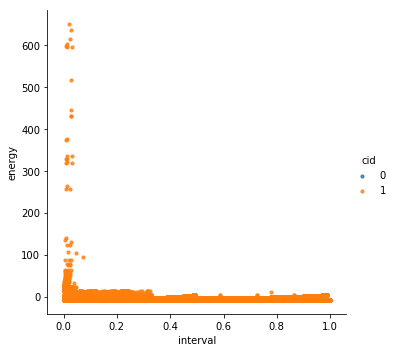

In [40]:
sns.lmplot('interval', 'energy', data=X, fit_reg=False, scatter_kws={'s':10}, hue='cid')